# IE582 HW2-Yasemin Aylin Akturk

For the codes, R-files and raw data please check: https://github.com/BU-IE-582/fall21-yaseminaylinakturk/tree/gh-pages/HW2

# Task#1:Dimensionality reduction

In [310]:
#I used a local path. This needs to be changed if wanted to re-run.
klasor =  "C:/Users/y.akturk/Documents/"
setwd(klasor)

dat=read.csv("IE582_Fall21_HW2_q1_data.csv",header=T)

       X1                X2          class 
 Min.   :-2.0000   Min.   :-1.7908   a:99  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99  
 Median :-0.2408   Median : 0.2578         
 Mean   :-0.1147   Mean   : 0.1006         
 3rd Qu.: 0.5128   3rd Qu.: 0.9786         
 Max.   : 1.8671   Max.   : 1.9992         

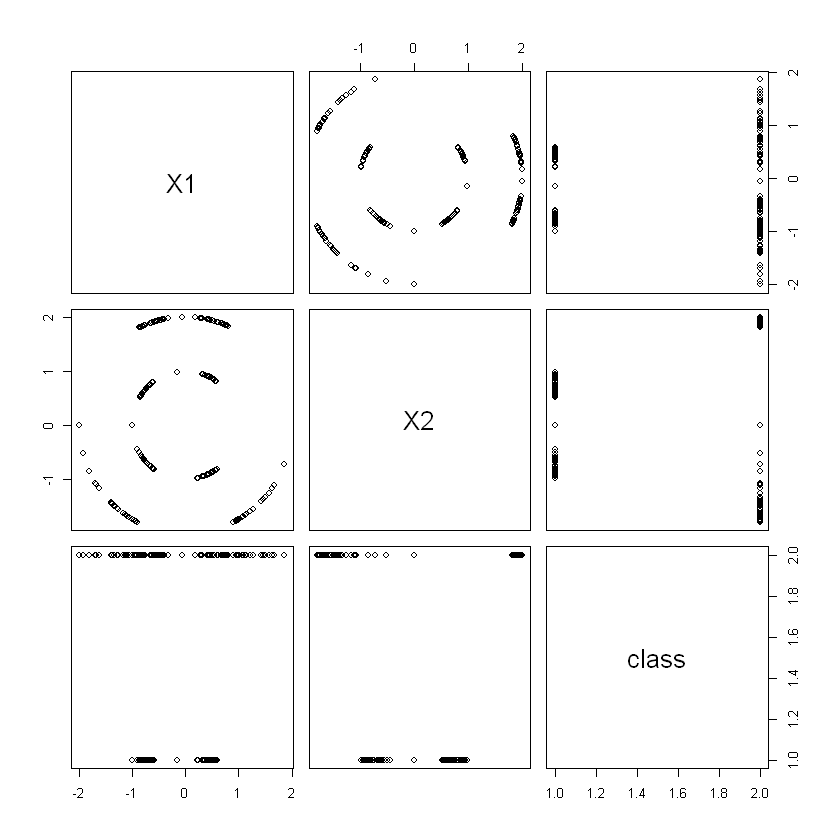

In [311]:
summary(dat)

plot(dat)

Note that they are same range.

In [312]:
#check the data
factor(dat[,3])
levels (factor(dat[,3]))
lev = as.numeric(factor(dat[,3]))
dat[1:3,1:3]

[1] a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
 [38] a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
 [75] a a a a a a a a a a a a a a a a a a a a a a a a a b b b b b b b b b b b b
[112] b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b
[149] b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b
[186] b b b b b b b b b b b b b
Levels: a b

[1] "a" "b"

X1,X2,class
0.5694828,0.8220033,a
0.4114692,0.9114237,a
0.4173846,-0.9087299,a


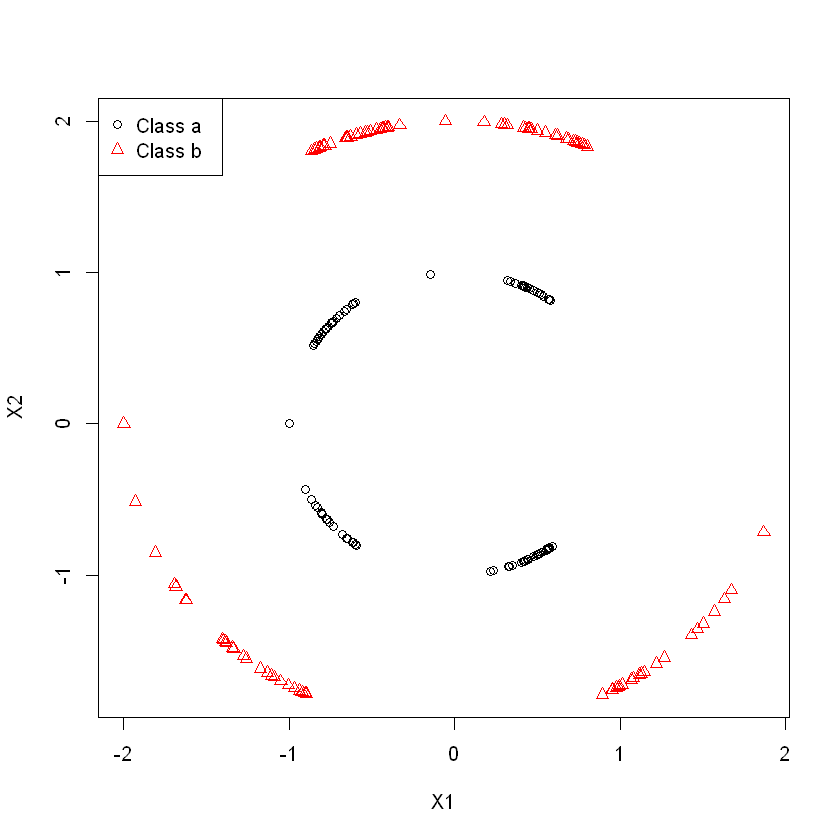

In [313]:
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])

legend("topleft",paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= unique(lev))

The relationship beyween x1 and x2 seems to be nonlinear.

In [314]:
cor(dat[,-3])


,X1,X2
X1,1.0000000000,0.0008849583
X2,0.0008849583,1.0000000000


No meaningful correlation between x1 and x2. Also, no linear relationship.

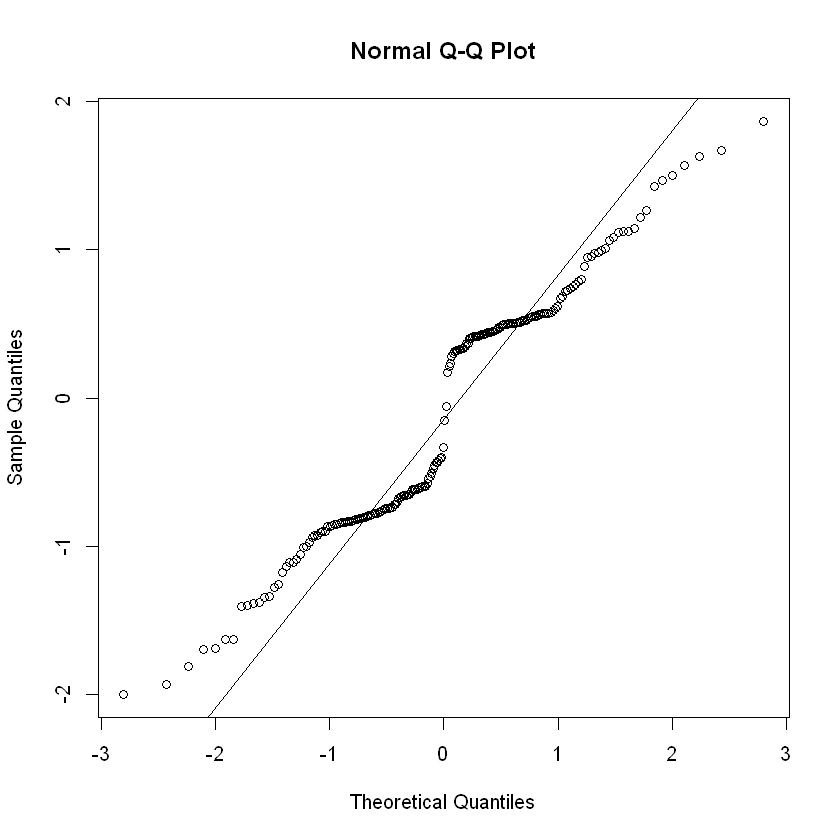

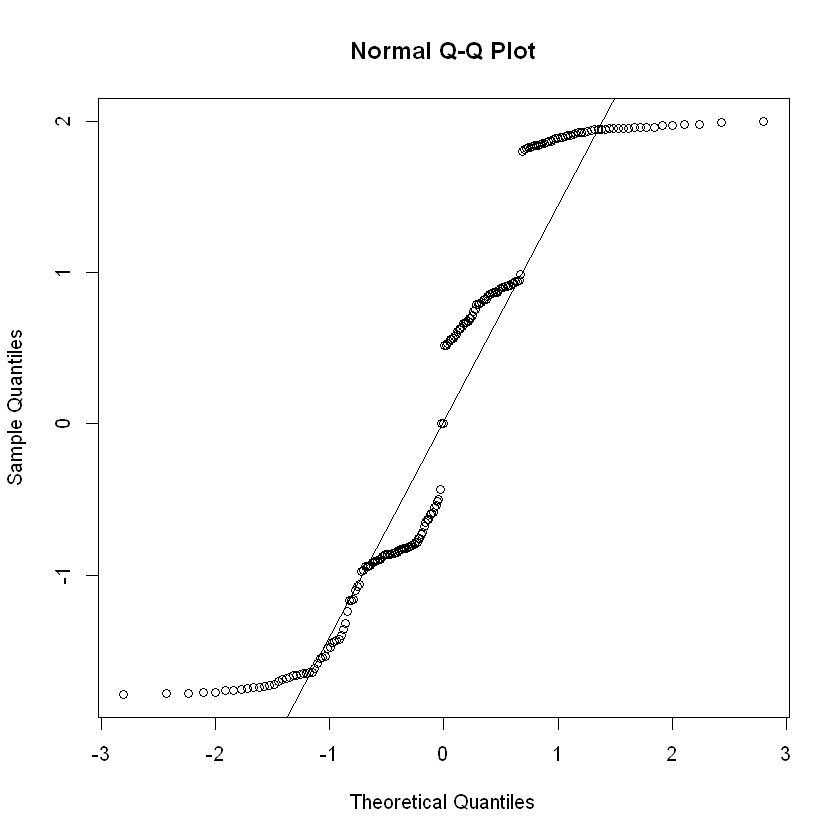

In [254]:
#check normality

qqnorm(dat[,1])
qqline(dat[,1])

qqnorm(dat[,2])
qqline(dat[,2])

The data does not seem to be normal.

### 1a)Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter plot. Note that the scatter plot will show the observation number versus the observed value (as we have a single feature to represent the instance).

In [315]:
#Apply pca
pca<-princomp(dat[,1:2], cor=T)
summary(pca, loadings=T)


Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

Loadings show the eigenvectors. Comp1 explains only the 50% of the variation.

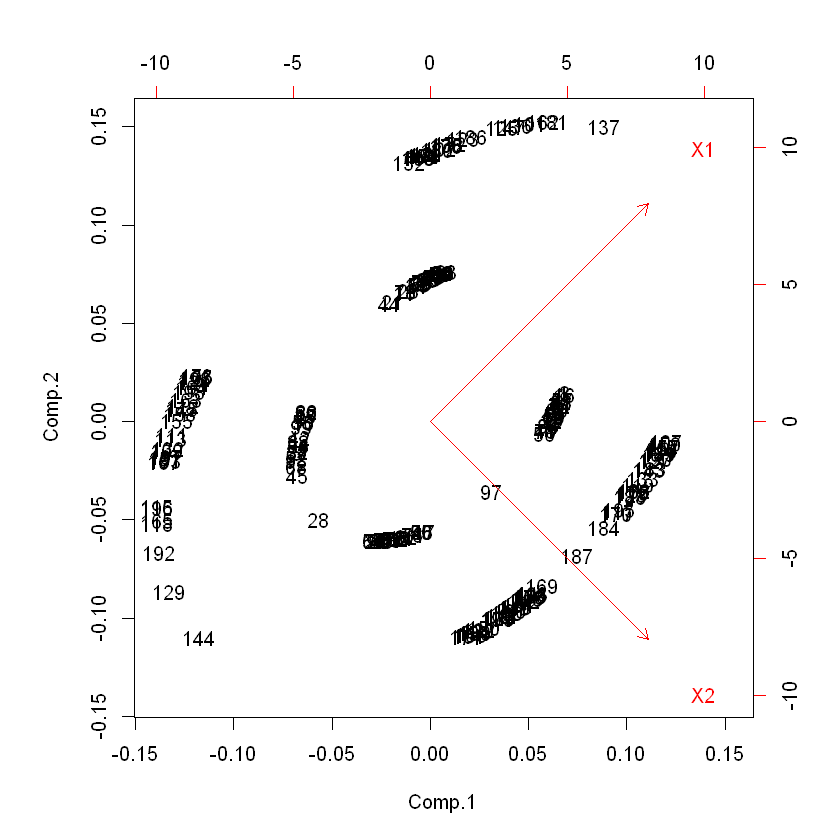

In [18]:
biplot(pca)
#shows the eigenvectors
#a basic rotation happens

In [19]:
#Only one component,eigenvector
pca$loadings[1,1]
pca$loadings[2,1]

[1] 0.7071068

[1] 0.7071068

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.95613 -0.40435  0.01971  0.00000  0.80924  1.69499 

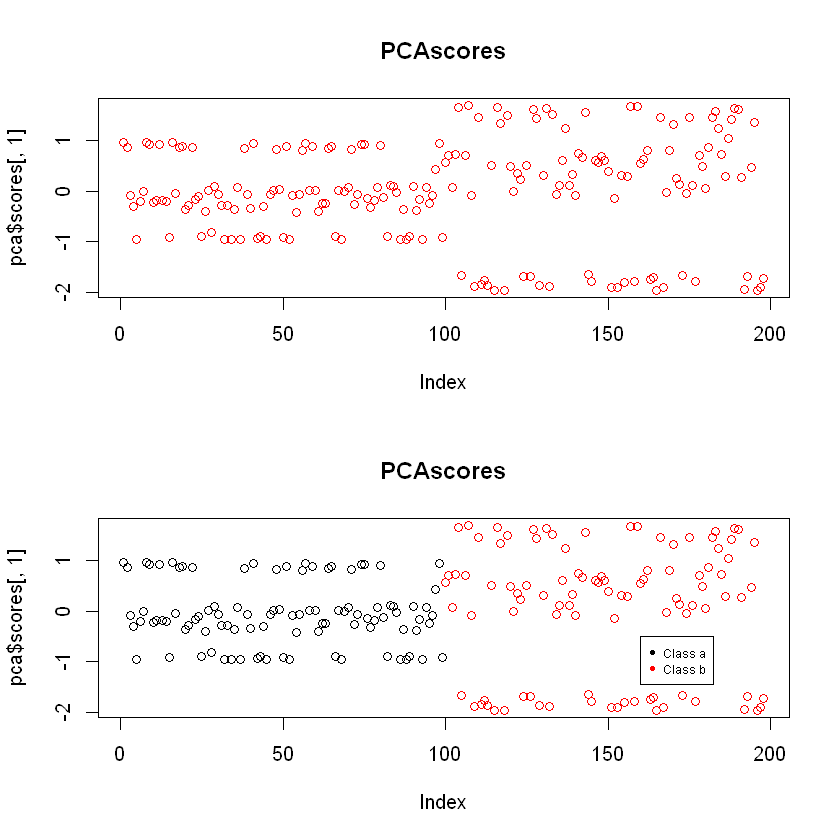

In [316]:
par(mfrow=c(2,1))
plot(pca$scores[,1],main= "PCAscores", col = "red")
plot(pca$scores[,1],main= "PCAscores", col = lev)
legend(160,-.5,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= 16,cex= 0.6)
summary(pca$scores[,1])

The plot shows the observation number versus the observed value in 1D. The first half of the observations fall into class-a, and the other half to the class-b.

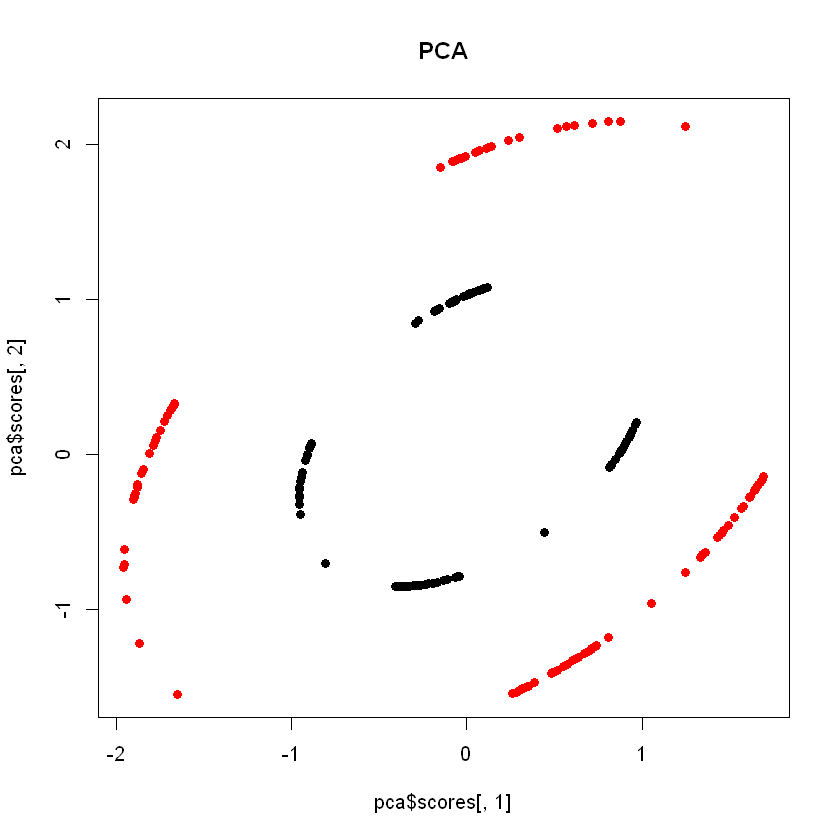

In [318]:
#just for visualization, plot pca 2 comp

plot(pca$scores[,1],pca$scores[,2],pch =16, col=lev, main ="PCA") 


### 1b) Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter plot as in part (a). Use at least two different similarity measure.

X1,X2
0.5694828,0.8220033
0.4114692,0.9114237
0.4173846,-0.9087299


1,2,3
0.0000000,0.1815607,1.737404
0.1815607,0.0000000,1.820163
1.7374036,1.8201632,0.000000


X1,X2
0.5694828,0.8220033
0.4114692,0.9114237
0.4173846,-0.9087299


1,2,3
0.0000000,0.2474339,1.882831
0.2474339,0.0000000,1.826069
1.8828313,1.8260690,0.000000


X1,X2
0.5694828,0.8220033
0.4114692,0.9114237
0.4173846,-0.9087299


1,2,3
0.0000000,0.1580135,1.730733
0.1580135,0.0000000,1.820154
1.7307332,1.8201536,0.000000


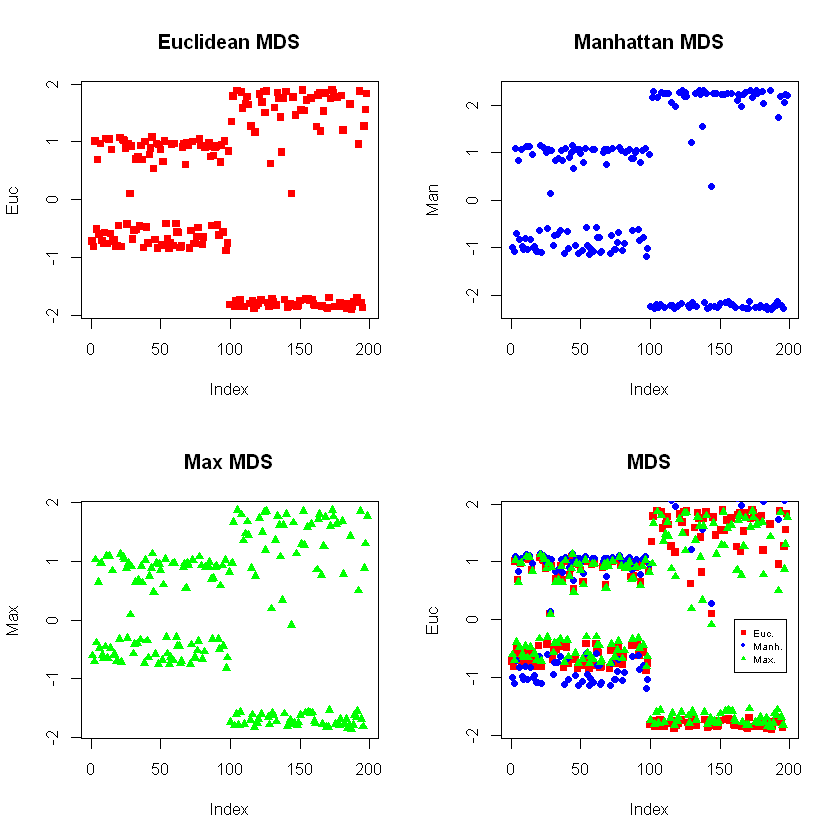

In [26]:
par(mfrow= c(2,2))

matEuc <- as.matrix(dist(dat[,1:2]))
dat[1:3,1:2]
#Sample Eucl. dist.
matEuc[1:3,1:3]

fitEuc <- stats:::cmdscale(matEuc,eig=TRUE, k=1)
Euc <- fitEuc$points[,1]

plot(Euc,main="Euclidean MDS", col = "red", pch=15)

###
matMan <- as.matrix(dist(dat[,1:2],method = "manhattan"))
dat[1:3,1:2]
#Sample Manh. dist.
matMan [1:3,1:3]

fitMan <- cmdscale(matMan,eig=TRUE, k=1)
Man <- fitMan$points[,1]
plot(Man,col="blue",main="Manhattan MDS",pch=16) 

###
matMax <- as.matrix(dist(dat[,1:2],method = "maximum"))
dat[1:3,1:2]
#Sample Max. dist.
matMax [1:3,1:3]

fitMax<- cmdscale(matMax,eig=TRUE, k=1)
Max <- fitMax$points[,1]
plot(Max,col="green",main="Max MDS",pch=17) 

###
#all together
plot(Euc,main="MDS", col = "red", pch =15)
points(Man,col="blue",main="Manhattan MDS", pch=16) 
points(Max,col="green",main="Max MDS", pch=17)
legend(160,0,legend=c("Euc.", "Manh.", "Max." ), pch= c(15,16,17), col=c("red","blue", "green"),bty ="o", horiz = F, cex=0.6, text.font = 18)



The result depends on the used distance measure. In each case, the plot shows the observation number versus the observed value in 1D.  On the last plot, the result of all MDS approaches with different distance measures are plotted together. Although they seem similar, the instances created with each are different. The classification is visible for each one; the first half of the observations fall into class-a, and the other half to the class-b (class distinction is shown distinctly in the next part).

### 1c)On a 2D scatter plot, one can observe how two observations from two classes are different.                                    1. What is your conclusion when you use PCA results in single dimension (your results from part a)?                        2. What is your conclusion when you use MDS results in single dimension (your results from part b)? Compare the results from different similarity measures used in part (b)                                                                                                   3. Compare MDS results with PCA. What is your conclusion?


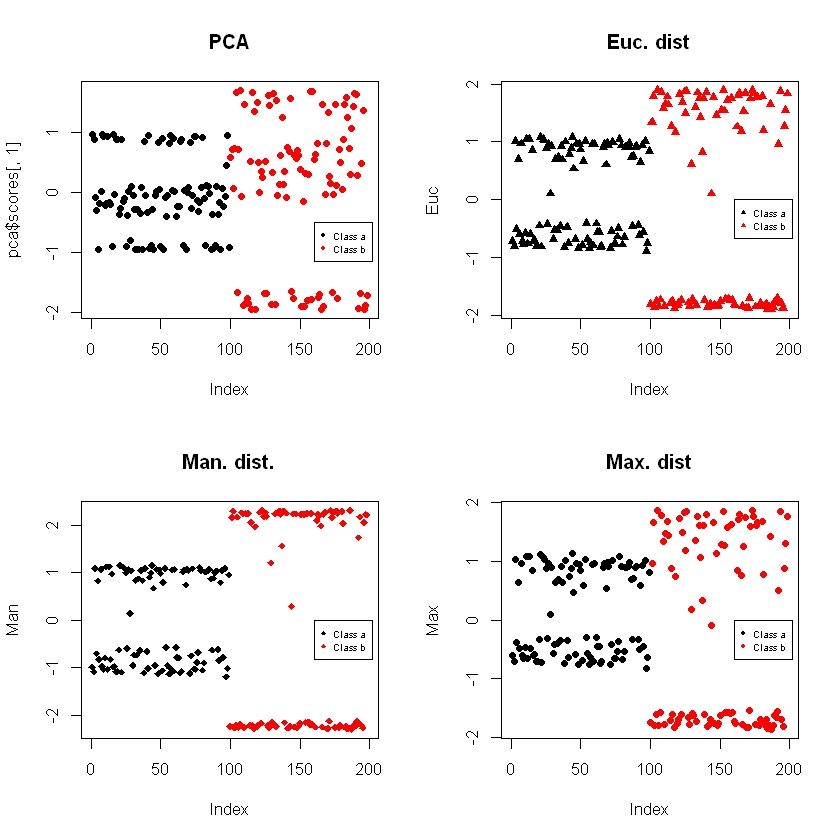

In [32]:
###PCA and MDS### for classes
par(mfrow= c(2,2))

plot(pca$scores[,1],pch =16, col=lev, main ="PCA") 
legend(160,-.5,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= 16,cex= 0.6)

plot(Euc, pch =17, col=lev,main = "Euc. dist")
legend(160,0,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= 17,cex= 0.6)

plot(Man, pch =18, col=lev, main = "Man. dist.")
legend(160,0,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= 18,cex= 0.6)

plot(Max, pch =19, col=lev, main = "Max. dist")
legend(160,0,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= 19,cex= 0.6)



The classification is visible for each one. On the above scatter plots, it is visible how two observations from two classes are different. 

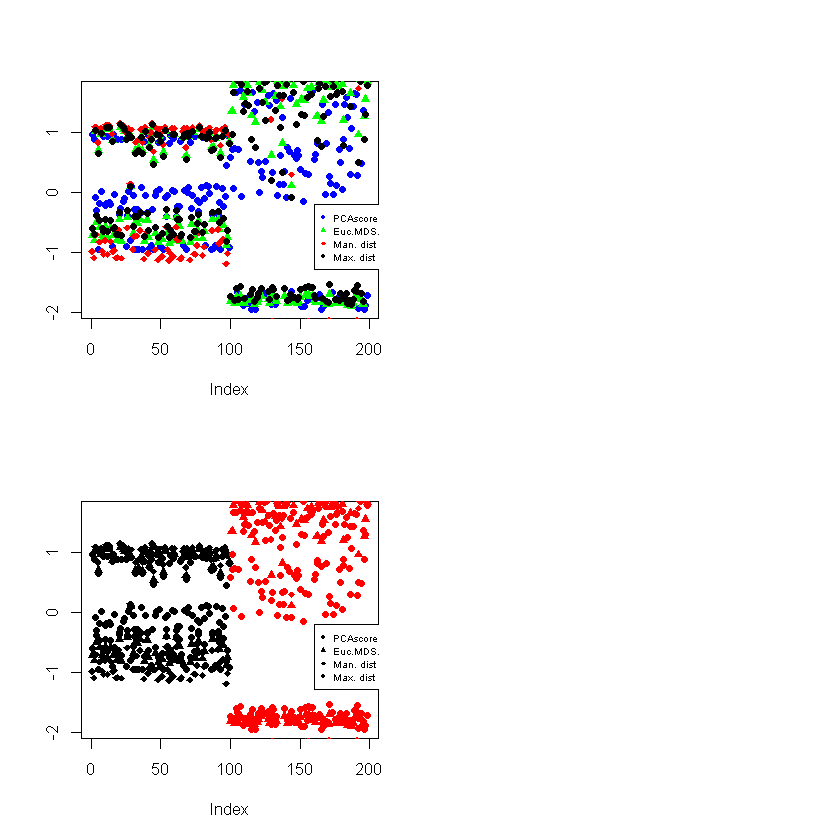

In [50]:
###PCA and MDS### comparison on single plot
par(mfcol= c(2,2))

plot(pca$scores[,1], col="blue",pch =16, ylab=" ") 
points(Euc, col = "green", pch =17)
points(Man, col = "red", pch =18)
points(Max, col = "black", pch =19)
legend(160,-0.2,legend=c("PCAscore", "Euc.MDS.", "Man. dist", "Max. dist" ), pch= c(16,17,18,19), col=c("blue", "green","red","black"),bty ="o", horiz = F, cex=0.6, text.font = 18)


plot(pca$scores[,1],pch =16, col=lev ,ylab=" ") 
points(Euc, pch =17, col=lev)
points(Man, pch =18, col=lev)
points(Max, pch =19, col=lev)
legend(160,-0.2,legend=c("PCAscore", "Euc.MDS.", "Man. dist", "Max. dist" ), pch= c(16,17,18,19),bty ="o", horiz = F, cex=0.6, text.font = 18)


The first plot shows that each technique located the instances to different points. The seconda one show that MDS visualized the classification better and PCA did not perform so well on nonlinear data.

 
1. What is your conclusion when you use PCA results in single dimension (your results from part a)?
 
 PCA was used to capture nonlinear relationship, which might be problematic. Comp1 explains only the 50% of the variation which may be considered small. The data is more scattered compared to MDS cases.


2. What is your conclusion when you use MDS results in single dimension (your results from part b)? Compare the results from different similarity measures used in part (b).

 Although the plots created with MDS with different distances seem similar, the graphs created with each metric are different. The MDS created more distinctive clusters.
  
 
3. Compare MDS results with PCA. What is your conclusion?
 
 PCA could not reduce the dimension effectively, due to the nonlinear relationship. The one principal axis is not an effieicient and informative summary of the data, 1D holds only the 50% variance info. Introduction of non-linear elements may be needed.
 
 MDS handles nonlinearity better. The class distinction in these cases are clearer. The distance information kept the clusters  clear and the classes of the data.

### 1d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a). Add the following columns to your data, X1^2 , X2^2 , X 1× X 2 (three columns as functions of your original variables) and apply PCA. Comment on the PCA results (i.e. what are the eigenvalues? What do they refer to?).

In [53]:
###add columns
#extended data
extdat <-data.frame(dat)
listX1sq = extdat[,1]^2 
extdat$x1sq <- listX1sq 
listX2sq = extdat[,2]^2 
extdat$x2sq <- listX2sq 
listx1X2 = extdat[,1]*extdat[,2]
extdat$x1x2<- listx1X2
extdat[1:3,]

X1,X2,class,x1sq,x2sq,x1x2
0.5694828,0.8220033,a,0.3243106,0.6756894,0.4681167
0.4114692,0.9114237,a,0.1693069,0.8306931,0.3750228
0.4173846,-0.9087299,a,0.1742099,0.8257901,-0.3792899


In [54]:
summary(extdat)
#same range, no need to standardize

       X1                X2          class       x1sq               x2sq       
 Min.   :-2.0000   Min.   :-1.7908   a:99   Min.   :0.003305   Min.   :0.0000  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99   1st Qu.:0.249322   1st Qu.:0.6560  
 Median :-0.2408   Median : 0.2578          Median :0.457800   Median :0.8974  
 Mean   :-0.1147   Mean   : 0.1006          Mean   :0.708035   Mean   :1.7920  
 3rd Qu.: 0.5128   3rd Qu.: 0.9786          3rd Qu.:0.812388   3rd Qu.:3.2030  
 Max.   : 1.8671   Max.   : 1.9992          Max.   :4.000000   Max.   :3.9967  
      x1x2         
 Min.   :-1.99945  
 1st Qu.:-0.49940  
 Median :-0.30717  
 Mean   :-0.01055  
 3rd Qu.: 0.49849  
 Max.   : 1.99978  

[1] "a" "b"

,X1,X2,x1sq,x2sq,x1x2
X1,1.0000000000,0.0008849583,-0.21732096,0.110299430,-0.418221702
X2,0.0008849583,1.0000000000,-0.46385646,0.337210928,-0.054897012
x1sq,-0.2173209550,-0.4638564555,1.00000000,-0.047837447,0.086866167
x2sq,0.1102994296,0.3372109275,-0.04783745,1.000000000,0.003243515
x1x2,-0.4182217020,-0.0548970116,0.08686617,0.003243515,1.000000000


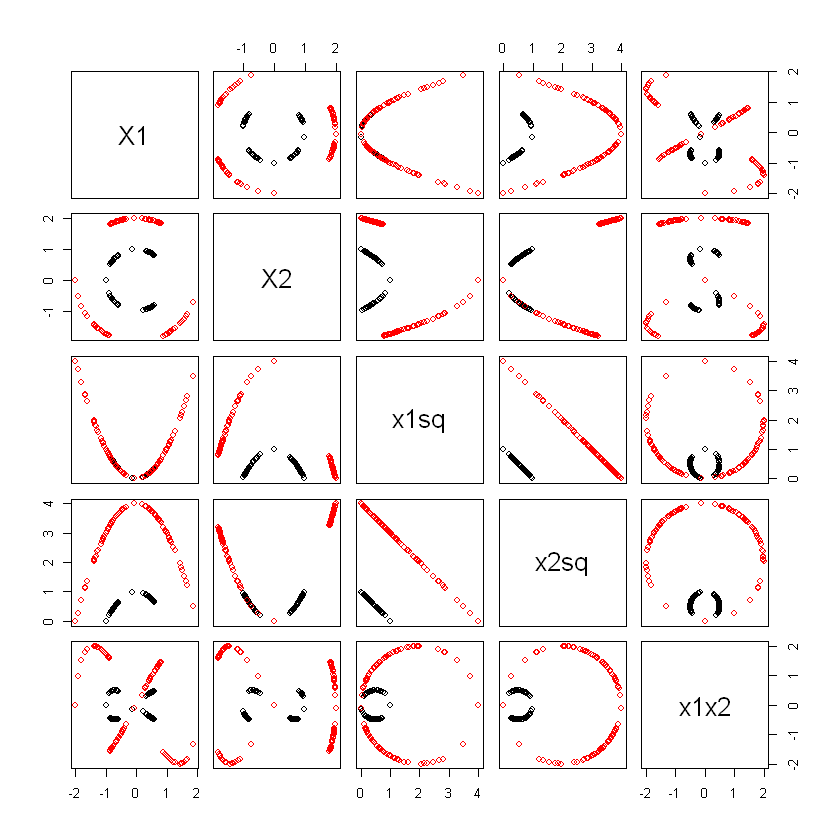

In [56]:
#factor(extdat[,3])
levels (factor(extdat[,3]))
extlev = as.numeric(factor(extdat[,3]))
plot(extdat[,-3], col = extlev)
cor(extdat[,-3])

Some variables obviously have nonlinear relationship. Whereas between x1sq and x2sq linear relationship within each class can be observed.

In [64]:
###apply PCA to extended data

extpca<-princomp(extdat[,-3], cor=T)
summary(extpca, loadings=T)


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1    0.419  0.556  0.128  0.571  0.415
X2    0.538 -0.454        -0.368  0.600
x1sq -0.539  0.162  0.578 -0.273  0.524
x2sq  0.351 -0.313  0.797  0.127 -0.356
x1x2 -0.348 -0.600         0.669  0.258

In [61]:
#eigenvectors
extpca$loadings
#eigenvectors of cor matrix
eigen(cor(extdat[,-3]))$vectors


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1    0.419  0.556  0.128  0.571  0.415
X2    0.538 -0.454        -0.368  0.600
x1sq -0.539  0.162  0.578 -0.273  0.524
x2sq  0.351 -0.313  0.797  0.127 -0.356
x1x2 -0.348 -0.600         0.669  0.258

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

-0.4191970,0.5563755,-0.12826946,-0.5712175,-0.4147020
-0.5384454,-0.4543840,0.08814923,0.3684325,-0.6000825
0.5387672,0.1624721,-0.57831433,0.2730006,-0.5237899
-0.3506677,-0.3129474,-0.79743530,-0.1271544,0.3564053
0.3480122,-0.5997068,0.07366230,-0.6687829,-0.2579586


In [63]:
#eigenvalues.
#show std dev
summary(extpca, loadings=F)
#find std.dev^2=var
extpca$sd^2
#find eigenvalues of correlation matrix
eigen(cor(extdat[,-3]))$values

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.7199160 1.3245681 0.9454741 0.6381908 0.3718509

[1] 1.7199160 1.3245681 0.9454741 0.6381908 0.3718509

The eigenvalues are shown above. The sqaure of the standard deviation (variance) for each Comp. gives the eigenvalues. Finding the eigenvalues of the correlation matrix has the same results. 

In [60]:
#The first 3 
extpca$loadings[,1]
extpca$loadings[,2]
extpca$loadings[,3]

X1         X2       x1sq       x2sq       x1x2 
 0.4191970  0.5384454 -0.5387672  0.3506677 -0.3480122

X1         X2       x1sq       x2sq       x1x2 
 0.5563755 -0.4543840  0.1624721 -0.3129474 -0.5997068

X1          X2        x1sq        x2sq        x1x2 
 0.12826946 -0.08814923  0.57831433  0.79743530 -0.07366230

The first 3 eigenvectors can explain the information kept in the variance as mush as 80%.

### For visualization 

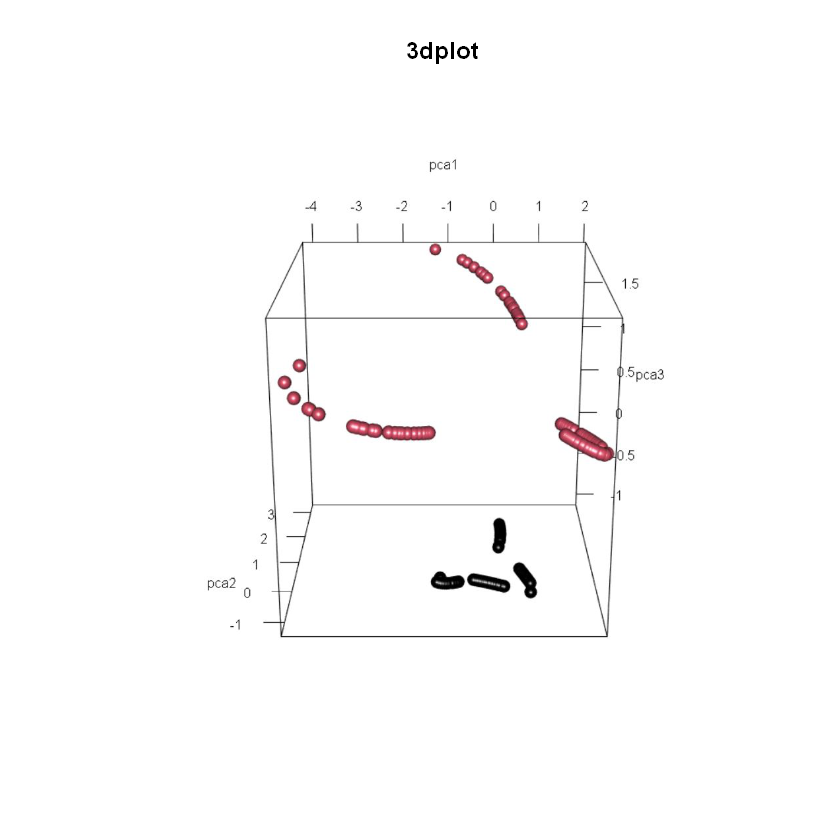

In [75]:
#install.packages("rgl")
#library(rgl)
#plot3d( 
 # x=extpca$scores[,1], y=extpca$scores[,2], extpca$scores[,3], 
 # col = lev, 
 # type = 's', 
  #radius = .1,
 # xlab="pca1", ylab="pca2", zlab="pca3")

#could not make the package rgl work here,I provided the code and I am adding the output, I got on Rstudio.

#visualize 3 pca compenents
library("jpeg")
img <- readJPEG("3dplot.jpg")
plot(0:1,0:1,xlab="",ylab="",type="n",axes=FALSE, main="3dplot")
rasterImage(img,0,0,1,1)

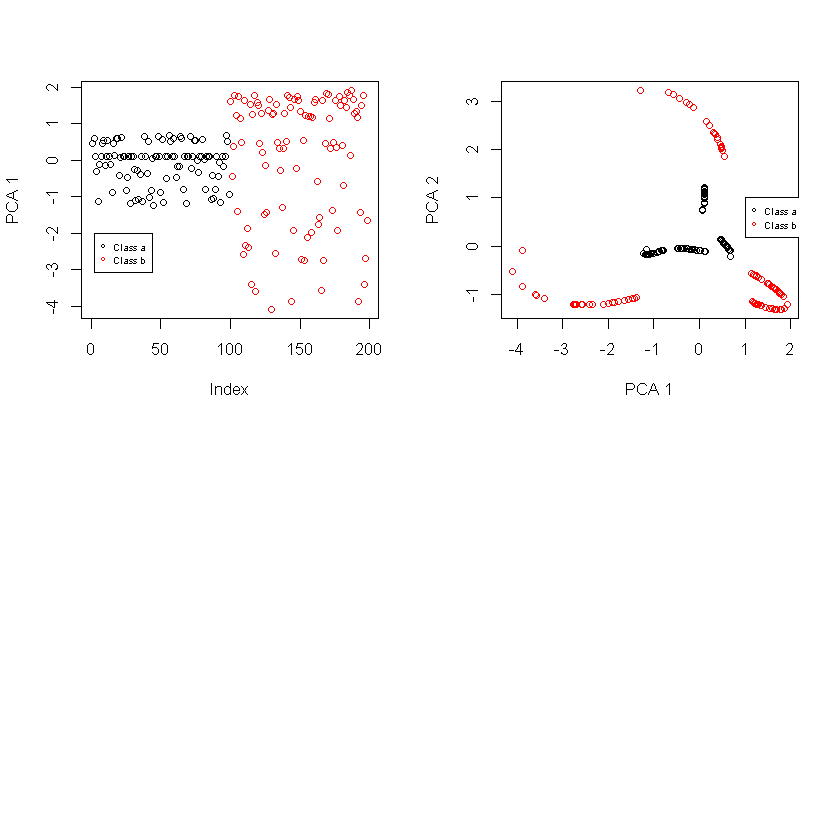

In [201]:
par(mfrow= c(2,2))
#visualize 1 pca compenent
plot(extpca$scores[,1], ylab= "PCA 1", col = lev)
legend(2,-2,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= c(1,1),cex= 0.6)

#visualize 2 pca compenents
plot ( extpca$scores[,1], extpca$scores[,2], col = lev, xlab=paste("PCA", 1, sep=" "), ylab=paste("PCA", 2, sep=" "))
  legend(1,1,paste("Class",levels (factor(dat[,3]))),col=unique(lev), pch= c(1,1),cex= 0.6)
  


Now, even in 1D the clusters are more clear.

# Task#2:Reconstructing Turkey Map

### Suppose we apply MDS to this data to distance matrix to obtain latent variables in 2D dimensional space. Represent the new feature space on a 2D plot. You are expected to label each data point with the respective city’s name. This plot should be similar to Turkey map. Are there any unusual observations? If yes, comment on your findings.

In [78]:
library("readxl")
library("jpeg")

# xls file
citydist <- read_excel("ilmesafe.xls",col_names = TRUE)

New names:
* `` -> ...1


A col name "1" is added. This column adds +1 to the dimension and makes it 81*82.

In [79]:
head(citydist[1:6,1:6])
dim(citydist)


...1,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA
ADANA,NA,335,575,966,603
ADIYAMAN,335,NA,910,648,632
AFYONKARAHİSAR,575,910,NA,1318,597
AĞRI,966,648,1318,NA,738
AMASYA,603,632,597,736,NA
ANKARA,492,742,256,1054,333


[1] 81 82

In [80]:
#only the lower part
#do not take the row names which is in the first column
distance_matrix <- as.dist(citydist[,-1])
print(distance_matrix)


                    ADANA ADIYAMAN AFYONKARAHİSAR AĞRI AMASYA ANKARA ANTALYA
ADIYAMAN              335                                                   
AFYONKARAHİSAR        575      910                                          
AĞRI                  966      648           1318                           
AMASYA                603      632            597  736                      
ANKARA                492      742            256 1054    333               
ANTALYA               535      870            291 1428    825    543        
ARTVİN               1035      751           1243  396    693    979    1466
AYDIN                 874     1209            345 1640    938    597     339
BALIKESİR             903     1238            328 1567    831    536     507
BİLECİK               773     1045            212 1358    622    316     475
BİNGÖL                636      348           1095  356    641    892    1171
BİTLİS                732      414           1285  234    831   1082    1267

In [81]:
# MDS, default k=2
city_mds <- stats:::cmdscale(distance_matrix)
# print the coordinates for each city
city_mds[1:10,]
#check the scale for plotting purposes.
summary(city_mds)

ADANA,75.80127,-378.52239
ADIYAMAN,413.32294,-291.49373
AFYONKARAHİSAR,-469.01602,-164.44077
AĞRI,769.80750,247.83978
AMASYA,17.41702,199.57308
ANKARA,-267.06178,24.95882
ANTALYA,-450.26071,-488.68095
ARTVİN,633.45573,449.70537
AYDIN,-756.16158,-317.64194
BALIKESİR,-776.56410,-30.54855


       V1                V2         
 Min.   :-908.49   Min.   :-488.68  
 1st Qu.:-491.56   1st Qu.:-215.81  
 Median : -36.69   Median : -17.75  
 Mean   :   0.00   Mean   :   0.00  
 3rd Qu.: 454.63   3rd Qu.: 247.84  
 Max.   :1044.52   Max.   : 449.71  

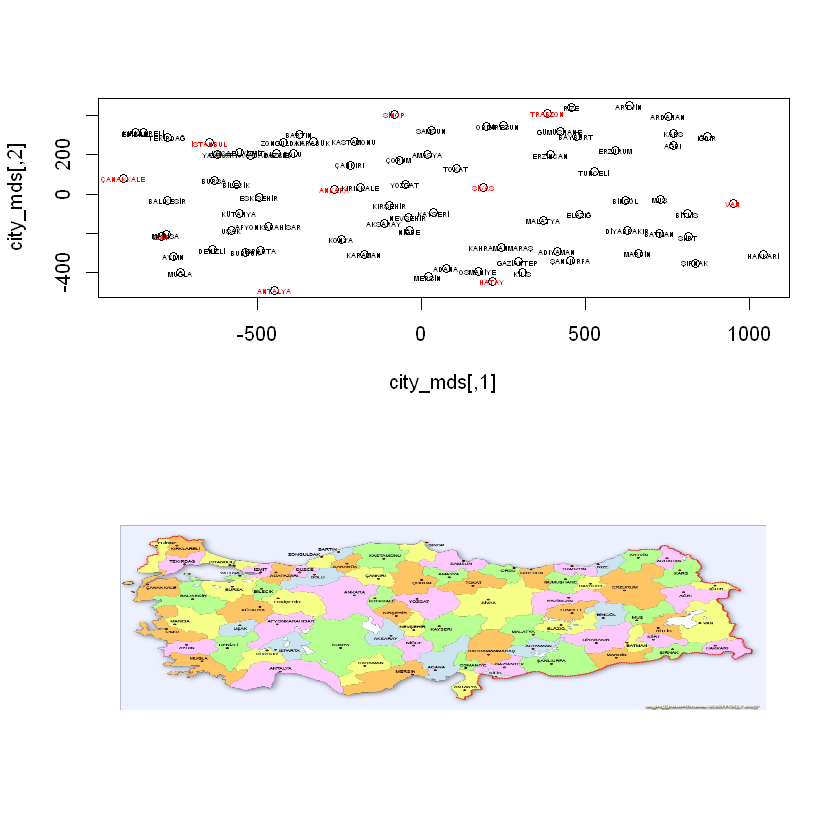

In [99]:
#plot map obtained by MDS
par(mfrow= c(2,1))
plot(city_mds)

#identifies the cities, and highlight major ones.

text(city_mds[,1], city_mds[,2], labels=rownames(city_mds),
     col=ifelse(rownames(city_mds) == "İSTANBUL" |
                rownames(city_mds) ==  "ANKARA" |
                rownames(city_mds) ==  "SİNOP"|
                rownames(city_mds) ==  "HATAY"|
                rownames(city_mds) ==  "İZMİR"  |
                rownames(city_mds) ==  "VAN"|
                rownames(city_mds) ==  "ANTALYA"  |
                 rownames(city_mds) ==  "ÇANAKKALE" |
                rownames(city_mds) ==  "SİVAS" |
                rownames(city_mds) ==  "TRABZON" 
                , "red", "black") 
                 , cex= 0.35)


mapimg <- readJPEG("turkeymap.jpg")

plot(city_mds, xlab= "", ylab="", axes = F, col="white")
rasterImage(mapimg,-920,-490,1050,450)




The map obtained by MDS looks prety much like the actual map.

# Task#3:Dimensionality reduction for time series data

In [228]:
library(plot3D)
#library(plotly)
#could not install/require plotly

In [115]:
x_acc <- read.csv2("uWaveGestureLibrary_X_TRAIN.csv", header = F, fileEncoding = 'UTF-8-BOM')
y_acc <- read.csv2("uWaveGestureLibrary_Y_TRAIN.csv", header = F, fileEncoding = 'UTF-8-BOM')
z_acc <- read.csv2("uWaveGestureLibrary_Z_TRAIN.csv", header = F, fileEncoding = 'UTF-8-BOM')

colnames (x_acc)[1] = c("Ges_Class")
colnames (y_acc)[1] = c("Ges_Class")
colnames (z_acc)[1] = c("Ges_Class")

head(x_acc)
dim(x_acc)

Ges_Class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30,...,-0.80,-0.74,-0.69,-0.65,-0.65,-0.65,-0.65,-0.65,-0.65,-0.65
5,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,1.63,...,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24,-0.24
5,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,...,-0.28,-0.24,-0.19,-0.15,-0.10,-0.06,-0.06,-0.06,-0.06,-0.06
3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,1.21,1.15,1.09,1.06,1.05,1.04,1.02,0.91,0.79,0.67
4,1.29,1.29,1.29,1.29,1.29,1.29,1.29,1.29,1.29,...,-1.44,-1.44,-1.44,-1.44,-1.44,-1.44,-1.45,-1.47,-1.48,-1.50
8,-0.48,-0.48,-0.48,-0.48,-0.48,-0.48,-0.48,-0.48,-0.48,...,0.58,0.59,0.60,0.61,0.62,0.64,0.65,0.67,0.69,0.71


[1] 896 316

In [103]:
#sample
x_acc[1:8,1:3]
y_acc[1:8,1:3]
z_acc[1:8,1:3]

Ges_Class,V2,V3
6,-0.30,-0.30
5,1.63,1.63
5,0.66,0.66
3,0.01,0.01
4,1.29,1.29
8,-0.48,-0.48
7,1.47,1.47
4,0.31,0.31


Ges_Class,V2,V3
6,-2.12,-2.12
5,0.67,0.67
5,-0.19,-0.19
3,0.37,0.37
4,-0.40,-0.40
8,-1.08,-1.08
7,1.26,1.26
4,-0.33,-0.33


Ges_Class,V2,V3
6,-1.53,-1.53
5,1.79,1.79
5,0.52,0.52
3,0.31,0.31
4,-0.47,-0.47
8,0.66,0.66
7,1.24,1.24
4,-1.30,-1.30


In [104]:
#Get Acceleration
Get_Acc <-function(ID)
{
  #get the first row no where matches the ID 
  #filter and get the first
  rowID <- dplyr:::nth (which(x_acc[,1]==ID),1) 
  #combine data X,Y,z
  comb_acc_data<-as.data.frame(cbind(t(x_acc[rowID,]),t(y_acc[rowID,]),t(z_acc[rowID,]))) 
  #rename cols
  colnames(comb_acc_data)<-c("corX","corY","corZ")
  #drop first
  #donot name the rows
  comb_acc_data<-comb_acc_data[-1,] 
  rownames(comb_acc_data)<-NULL
  return(comb_acc_data)
}

#Get Velocity
Get_Velo <-function(ID)
{
  #get the first row no where matches the ID 
  #filter and get the first
  rowID <- dplyr:::nth (which(x_acc[,1]==ID),1) 
  #combine data X,Y,z
  comb_acc_data<-as.data.frame(cbind(t(x_acc[rowID,]),t(y_acc[rowID,]),t(z_acc[rowID,]))) 
  #rename cols
  colnames(comb_acc_data)<-c("corX","corY","corZ")
  #drop first
  #donot name the rows
  comb_acc_data<-comb_acc_data[-1,] 
  rownames(comb_acc_data)<-NULL
  #acceleration to velocity, col. cum. sum
  comb_velo_data<-apply(comb_acc_data,2,cumsum) 
  return(comb_velo_data)
}


#Get Position
Get_Pos <-function(ID)  
  {
  #get the first row no where matches the ID 
  #filter and get the first
  rowID <- dplyr:::nth (which(x_acc[,1]==ID),1) 
  #combine data X,Y,z
  comb_acc_data<-as.data.frame(cbind(t(x_acc[rowID,]),t(y_acc[rowID,]),t(z_acc[rowID,]))) 
  #rename cols
  colnames(comb_acc_data)<-c("corX","corY","corZ")
  #drop first
  #donot name the rows
  comb_acc_data<-comb_acc_data[-1,] 
  rownames(comb_acc_data)<-NULL
  #acceleration to velocity, col. cum. sum
  comb_velo_data<-apply(comb_acc_data,2,cumsum) 
  #acceleration to position, col. cum. sum
  comb_pos_data<-apply(comb_velo_data,2,cumsum) 
  
  return(  comb_pos_data)
  }

In [105]:
#sample
Get_Acc(1)[1:8,]
Get_Velo(1)[1:8,]
Get_Pos(1)[1:8,]

corX,corY,corZ
-0.79,-1.96,-0.25
-0.79,-1.96,-0.25
-0.80,-1.96,-0.25
-0.81,-1.95,-0.26
-0.85,-1.92,-0.28
-0.90,-1.87,-0.31
-0.93,-1.85,-0.32
-0.95,-1.84,-0.33


corX,corY,corZ
-0.79,-1.96,-0.25
-1.58,-3.92,-0.50
-2.38,-5.88,-0.75
-3.19,-7.83,-1.01
-4.04,-9.75,-1.29
-4.94,-11.62,-1.60
-5.87,-13.47,-1.92
-6.82,-15.31,-2.25


corX,corY,corZ
-0.79,-1.96,-0.25
-2.37,-5.88,-0.75
-4.75,-11.76,-1.50
-7.94,-19.59,-2.51
-11.98,-29.34,-3.80
-16.92,-40.96,-5.40
-22.79,-54.43,-7.32
-29.61,-69.74,-9.57


## Visuals

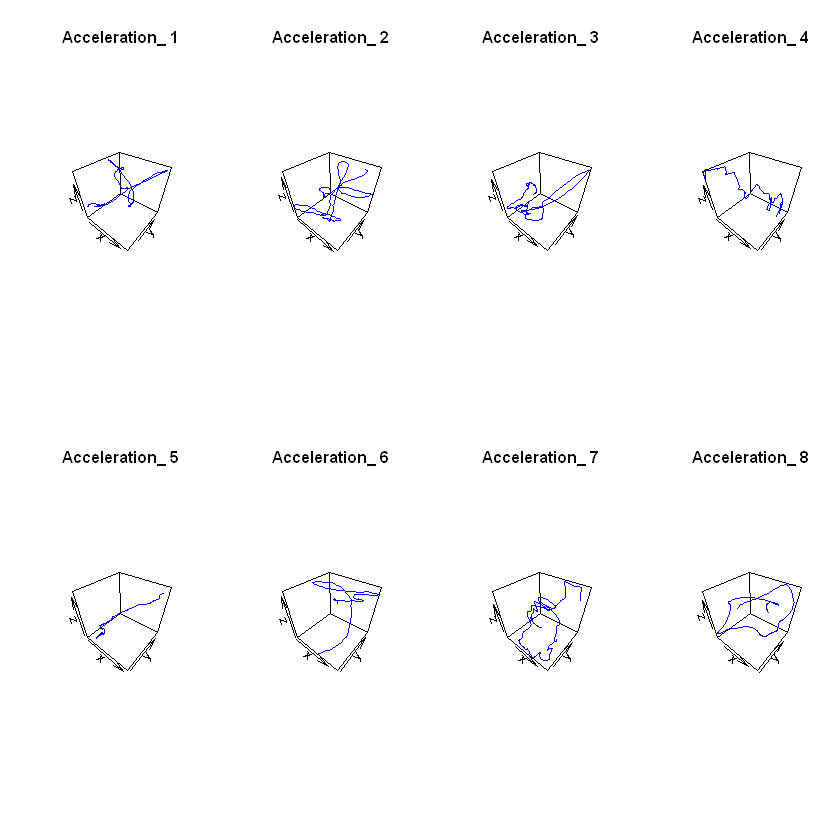

In [106]:
#plot 3d 
#first col has the gesture ID
gestID <- sort(unique(x_acc[,1]), decreasing = F)

#plot Acceleration
par(mfrow = c(2,4))

for (a in gestID)
  
{
  
  accel <- Get_Acc(a)

  plot3D::scatter3D(x = accel[,1],y = accel[,2],z = accel[,3],main = paste("Acceleration_", a) ,xlab = "x",ylab = "y",zlab = "z", col = "blue",type="l") 
  
}

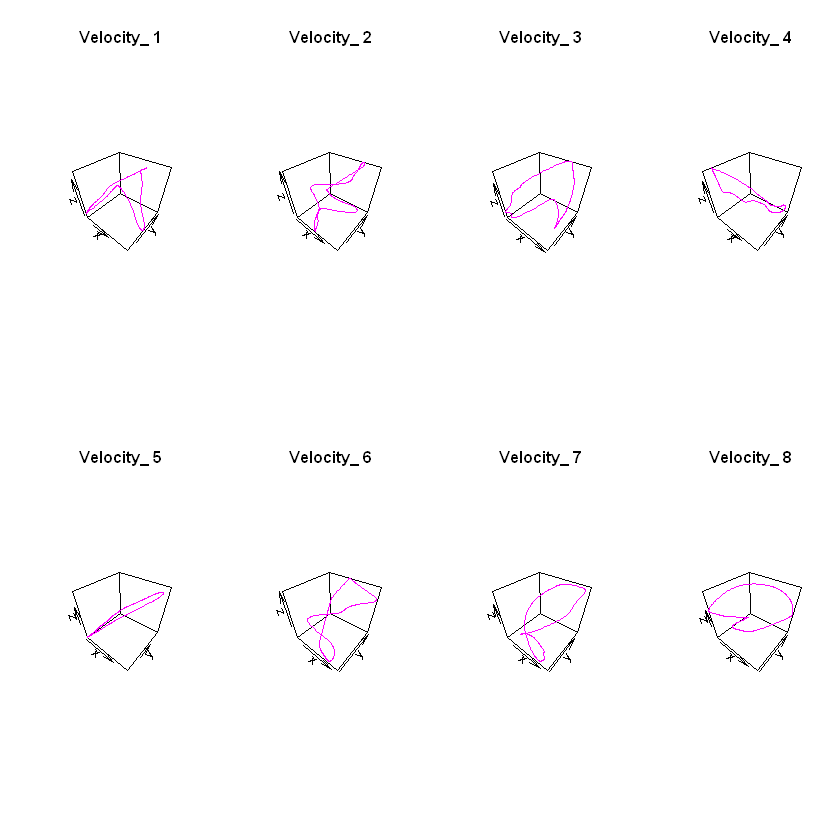

In [108]:
#plot Velocity
par(mfrow = c(2,4))

for (v in gestID)
  
{
  
  velocity <- Get_Velo(v)
  
  plot3D::scatter3D(x = velocity[,1],y = velocity[,2],z = velocity[,3],main = paste("Velocity_", v) ,xlab = "x",ylab = "y",zlab = "z", col = "magenta",type="l") 
  
}


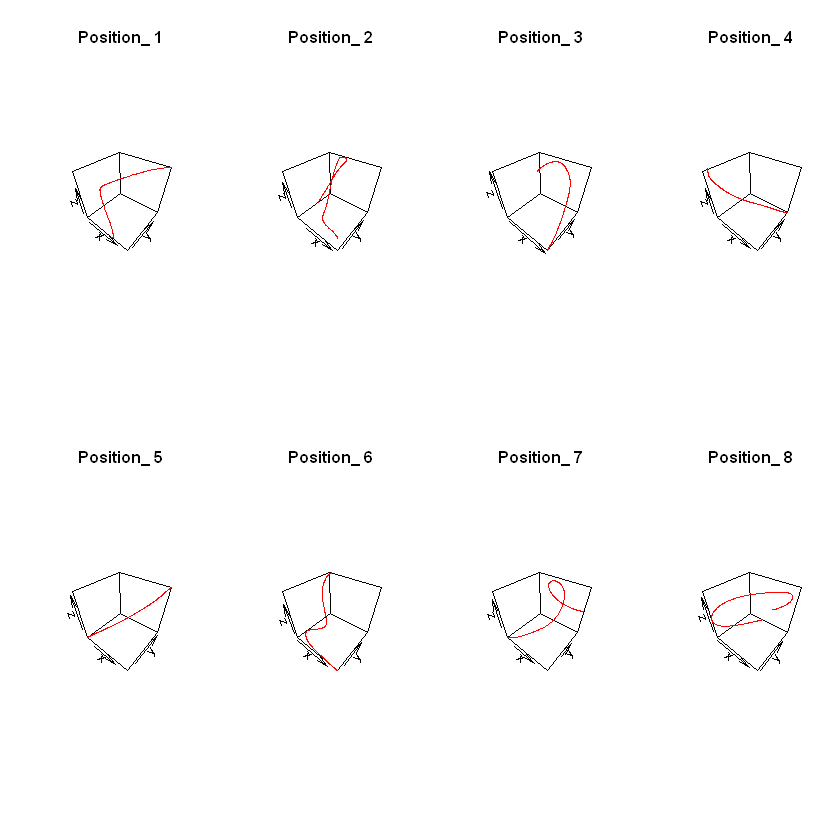

In [109]:
#plot Position
par(mfrow = c(2,4))

for (p in gestID)
  
{
  
  position <- Get_Pos(p)
  
  plot3D::scatter3D(x = position[,1],y = position[,2],z = position[,3],main = paste("Position_", p) ,xlab = "x",ylab = "y",zlab = "z", col = "red",type="l") 
  
}

In [ ]:
#rotatable plots

position_1 <- Get_Pos(1)
plot_ly(x = position_1[,1], y = position_1[,2], z = position_1[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #1")
position_2 <- Get_Pos(2)
plot_ly(x = position_2[,1], y = position_2[,2], z = position_2[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #2")
position_3 <- Get_Pos(3)
plot_ly(x = position_3[,1], y = position_3[,2], z = position_3[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #3")
position_4 <- Get_Pos(4)
plot_ly(x = position_4[,1], y = position_4[,2], z = position_4[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #4")
position_5 <- Get_Pos(5)
plot_ly(x = position_5[,1], y = position_5[,2], z = position_5[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #5")
position_6 <- Get_Pos(6)
plot_ly(x = position_6[,1], y = position_6[,2], z = position_6[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #6")
position_7 <- Get_Pos(7)
plot_ly(x = position_7[,1], y = position_7[,2], z = position_7[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #7")
position_8 <- Get_Pos(8)
plot_ly(x = position_8[,1], y = position_8[,2], z = position_8[,3], type="scatter3d", mode="markers") %>% layout(title = "Gesture #8")


I tried several ways to make interactive "plotly" graphs to work in Jupiter notebook, but could not succeed. Here, I am adding the exported interactive image.Please check the links below to get the interactive 3d plots of the Gesture Classes.

https://rpubs.com/yasemin_akturk/Gesture1

https://rpubs.com/yasemin_akturk/Gesture2

https://rpubs.com/yasemin_akturk/Gesture3

https://rpubs.com/yasemin_akturk/Gesture4

https://rpubs.com/yasemin_akturk/Gesture5

https://rpubs.com/yasemin_akturk/Gesture6

https://rpubs.com/yasemin_akturk/Gesture7

https://rpubs.com/yasemin_akturk/Gesture8

# PCA

In [214]:
#PCA###########
cop_x_acc = x_acc
cop_y_acc = y_acc[,-1]
cop_z_acc = z_acc[,-1]


colnames(cop_x_acc)[2:316] <-paste("X.", 1:315)
colnames(cop_y_acc)[1:315] <-paste("Y.", 1:315)
colnames(cop_z_acc)[1:315] <-paste("Z.", 1:315)

In [229]:
Get_Conc <-function(ID)  
{
  #get the rows class no  matches the ID 
  #filter
  rowlist <-  which(cop_x_acc[,1]==ID) 
    #combine data X,Y,z
  Data_Conc <-as.data.frame(cbind(cop_x_acc[rowlist,],cop_y_acc[rowlist,],cop_z_acc[rowlist,])) 
 
  return(Data_Conc)
}



## Draw the each eigenvector (component) as a time series for each class. 

In total, you are expected to provide 8 plots. Each plot is expected to provide two time series (i.e. first eigenvector and the second eigenvector). 

What do the eigenvectors imply in this setting?

    In this case we have the x1-x2-x3--xt-y1-y2-y3--yt-z1-z2-z3---zt in columns.
    When we apply PCA, it gets the eigenvalues which are the linear combination of these  x1-x2-x3---y1-y2-y3--z1-z2-z3---- variables. For each class we get a 3t unit long eigenvector which is the linear combination of the features.

How much variability can be recovered by the first two components?

    For each class the variance covered by the first two components are given below.



## Gesture#1 detailed explanation

In [280]:
###Class1
Get_Conc(1)[1:6, c(1,2,317,632)]

Conc_Data1 = Get_Conc(1)
dim(Conc_Data1)


,Ges_Class,X. 1,Y. 1,Z. 1
11,1,-0.79,-1.96,-0.25
17,1,-0.45,-1.97,-1.29
19,1,-0.19,-1.24,-0.81
23,1,0.30,-1.49,-1.15
38,1,0.16,-0.62,-1.33
43,1,-0.93,-1.68,-1.80


[1] 122 946

In [281]:
#sample
Conc_Data1 [c(1,2),1:6]
Conc_Data1 = Conc_Data1[,-1] #remove first col where class info in presented
Conc_Data1 [c(1,2),1:6]

,Ges_Class,X. 1,X. 2,X. 3,X. 4,X. 5
11,1,-0.79,-0.79,-0.80,-0.81,-0.85
17,1,-0.45,-0.45,-0.45,-0.45,-0.45


,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
11,-0.79,-0.79,-0.80,-0.81,-0.85,-0.90
17,-0.45,-0.45,-0.45,-0.45,-0.45,-0.45


In [282]:
pca1 <- prcomp(Conc_Data1,scale =T)
summary(pca1)
pca1$rotation  #eigenvectors 

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     13.008 11.6602 9.47771 9.10856 8.41639 7.60131 6.96665
Proportion of Variance  0.179  0.1439 0.09506 0.08779 0.07496 0.06114 0.05136
Cumulative Proportion   0.179  0.3229 0.41798 0.50578 0.58073 0.64188 0.69324
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     5.76494 5.44157 4.61573 4.53207 4.49853 4.11350 4.00964
Proportion of Variance 0.03517 0.03133 0.02254 0.02174 0.02141 0.01791 0.01701
Cumulative Proportion  0.72840 0.75974 0.78228 0.80402 0.82543 0.84334 0.86035
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.48493 3.37997 3.30551 3.14585 2.88597 2.78277 2.67458
Proportion of Variance 0.01285 0.01209 0.01156 0.01047 0.00881 0.00819 0.00757
Cumulative Proportion  0.87320 0.88529 0.89685 0.90733 0.91614 0.92434 0.93190
                          PC22

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122
X. 1,0.05881506,-0.03148719,-0.02292035,-0.0025145599,0.007768626,-0.01494375,0.02665435,0.009785159,-0.003491972,-0.02404452,...,-0.120478552,-0.0054807996,0.009893946,6.783825e-02,2.035175e-02,-0.0085190056,0.0056473925,-0.0731209167,-0.018037739,-0.21924045
X. 2,0.05856993,-0.03170022,-0.02299144,-0.0027475895,0.007549549,-0.01448730,0.02702608,0.010168983,-0.003744805,-0.02436113,...,-0.110379140,0.0015114025,0.002564942,5.605316e-02,2.885134e-02,-0.0024997335,0.0005993030,-0.0581600796,-0.030270741,-0.03336817
X. 3,0.05835695,-0.03192867,-0.02299340,-0.0028379514,0.007489850,-0.01423129,0.02705128,0.010676574,-0.004040224,-0.02452245,...,-0.104487809,0.0025990771,-0.005768090,4.852161e-02,3.111704e-02,-0.0030946590,-0.0085080644,-0.0482146570,-0.036656560,0.09902042
X. 4,0.05821744,-0.03222409,-0.02306071,-0.0028420087,0.007408052,-0.01408534,0.02696404,0.011182754,-0.004288682,-0.02452117,...,-0.108249577,0.0001594326,-0.008430224,4.176040e-02,3.649592e-02,0.0074035709,-0.0178245338,-0.0456511870,-0.038421284,-0.00315646
X. 5,0.05814358,-0.03242215,-0.02305171,-0.0029455852,0.007421946,-0.01404619,0.02687353,0.011640147,-0.004601947,-0.02452989,...,-0.094350146,-0.0057351162,-0.015092207,2.486155e-02,4.063373e-02,0.0031300770,-0.0268559126,-0.0308051379,-0.033110057,-0.14938522
X. 6,0.05809200,-0.03256788,-0.02305724,-0.0030927952,0.007579577,-0.01397101,0.02683224,0.011901815,-0.004827999,-0.02457605,...,-0.085077360,-0.0180355697,-0.020005302,8.862006e-03,3.700309e-02,-0.0040596441,-0.0357916033,-0.0252633445,-0.039488817,0.36297345
X. 7,0.05806950,-0.03261065,-0.02309123,-0.0030987309,0.007724887,-0.01396834,0.02686679,0.012038080,-0.004957864,-0.02465331,...,-0.062040106,-0.0111941203,-0.020114571,-9.021421e-04,2.611546e-02,-0.0037050947,-0.0312113524,-0.0153387565,-0.032799945,0.32557968
X. 8,0.05800788,-0.03272046,-0.02316160,-0.0030937197,0.007866478,-0.01393528,0.02692562,0.012194363,-0.004918930,-0.02475267,...,-0.024287103,-0.0017284932,-0.013044791,-1.384650e-02,1.386952e-02,0.0021594469,-0.0201512239,-0.0000259254,-0.022169972,-0.27762679
X. 9,0.05795675,-0.03281917,-0.02325983,-0.0030864410,0.007919056,-0.01399010,0.02698669,0.012276274,-0.004806157,-0.02474011,...,0.010480129,0.0246275977,0.004479395,-2.054966e-02,-3.440931e-03,0.0001907706,-0.0184959495,0.0113019575,-0.010995803,-0.25348770
X. 10,0.05790388,-0.03294416,-0.02328337,-0.0031199431,0.008002344,-0.01404634,0.02709705,0.012407022,-0.004611998,-0.02461828,...,0.039441566,0.0382378783,0.020315167,-2.844832e-02,-5.442566e-03,-0.0063148632,-0.0066953936,0.0204125201,-0.005692227,0.10520541


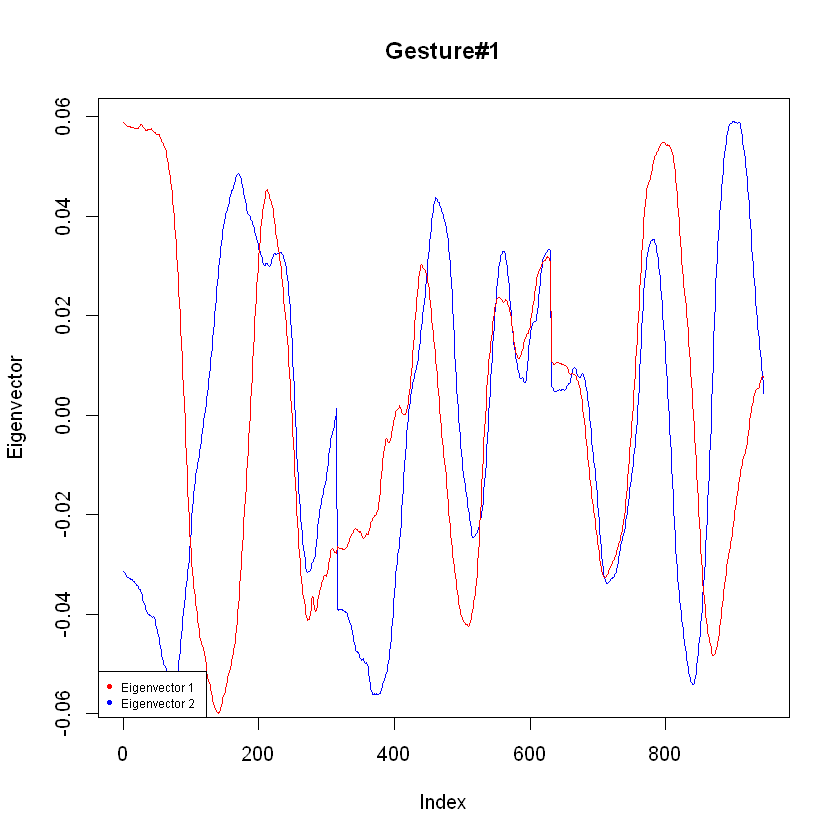

In [283]:
##plot

plot(pca1$rotation[,2], type="l",col="blue", main= "Gesture#1", ylab= "Eigenvector")
points(pca1$rotation[,1],type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)

In [284]:
##get explained variation proportion for first 2 comp

vars =  pca1$sdev * pca1$sdev
props = vars / sum(vars)
cumsum(props) [1:2]

[1] 0.1790536 0.3229259

The first eigenvector explains 17% of the variation and the two eigenvectors together explain 32% of the variaton.

# Gesture#2

In [285]:
###Class2
Conc_Data2 = Get_Conc(2)
Conc_Data2 = Conc_Data2[,-1]
Conc_Data2 [c(1,2),1:6]

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
15,1.20,1.20,1.23,1.33,1.36,1.38
20,0.14,0.14,0.14,0.14,0.14,0.14


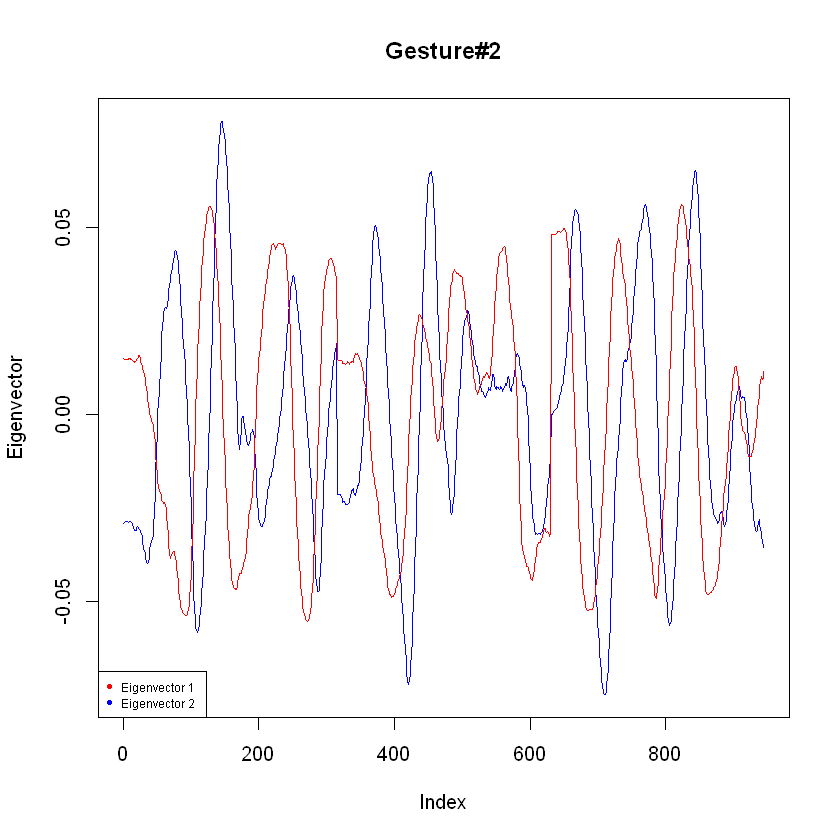

In [286]:
pca2 <- prcomp(Conc_Data2,  scale =T)

##plot

plot(pca2$rotation[,2], type="l",col="blue", main= "Gesture#2",ylab= "Eigenvector")
points(pca2$rotation[,1], type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)

In [288]:
##get explained variation proportion for first 2 comp

vars =  pca2$sdev * pca2$sdev
props = vars / sum(vars)
cumsum(props) [1:2]

[1] 0.2423087 0.3473450

The first eigenvector explains 24% of the variation and the two eigenvectors together explain 34% of the variaton.

# Gesture#3

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
4,0.01,0.01,0.01,0.01,0.01,0.01
13,-0.60,-0.60,-0.60,-0.60,-0.60,-0.60


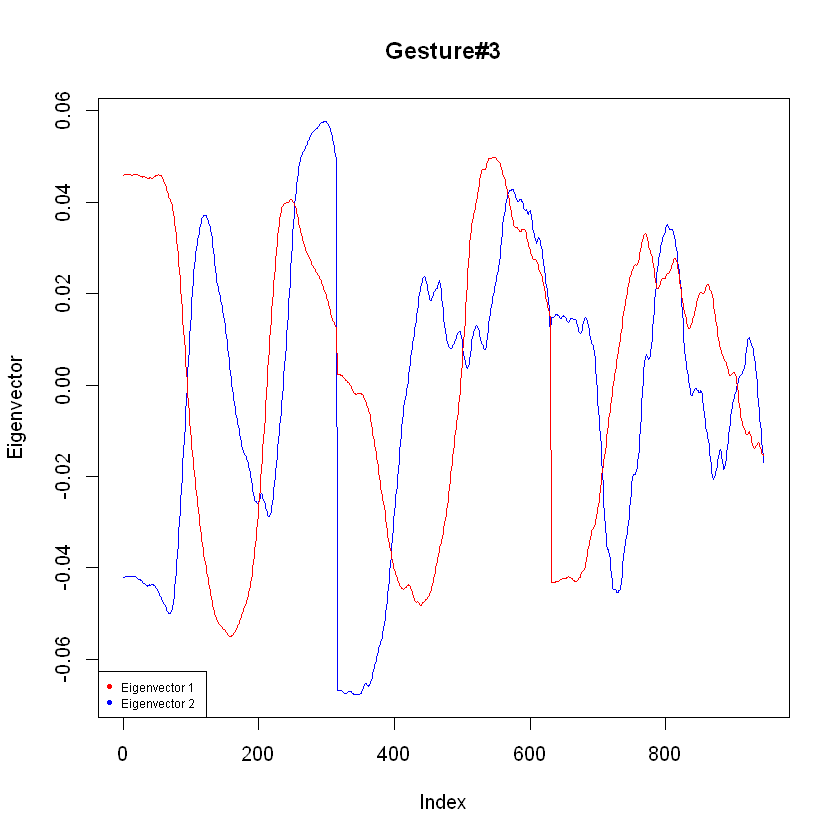

In [289]:
###Class3
Conc_Data3 = Get_Conc(3)
Conc_Data3 = Conc_Data3[,-1]
Conc_Data3 [c(1,2),1:6]

pca3 <- prcomp(Conc_Data3,  scale =T)

##plot

plot(pca3$rotation[,2], type="l",col="blue", main= "Gesture#3",ylab= "Eigenvector")
points(pca3$rotation[,1], type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)


In [290]:
##get explained variation proportion for first 2 comp

vars =  pca3$sdev * pca3$sdev
props = vars / sum(vars)
cumsum(props) [1:2]



[1] 0.2826323 0.4219377

The first eigenvector explains 28% of the variation and the two eigenvectors together explain 42% of the variaton.

## Gesture#4

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
5,1.29,1.29,1.29,1.29,1.29,1.29
8,0.31,0.31,0.31,0.31,0.31,0.31


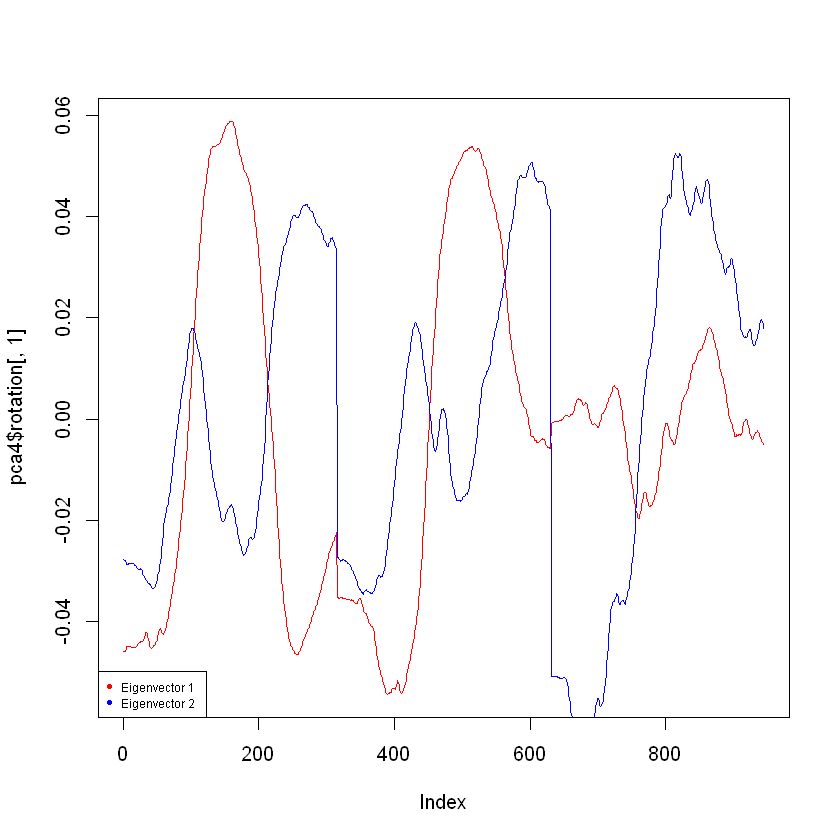

In [306]:
###Class4
Conc_Data4 = Get_Conc(4)
Conc_Data4 = Conc_Data4[,-1]
Conc_Data4 [c(1,2),1:6]

pca4 <- prcomp(Conc_Data4,  scale =T)

##plot

plot(pca4$rotation[,1], type="l",col="red")
points(pca4$rotation[,2], type="l",col="blue", main= "Gesture#4",ylab= "Eigenvector")


legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)

In [292]:
##get explained variation proportion for first 2 comp

vars =  pca4$sdev * pca4$sdev
props = vars / sum(vars)
cumsum(props) [1:2]


[1] 0.2458715 0.3715980

The first eigenvector explains 24% of the variation and the two eigenvectors together explain 37% of the variaton.

# Gesture#5

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
2,1.63,1.63,1.63,1.63,1.63,1.63
3,0.66,0.66,0.66,0.66,0.66,0.66


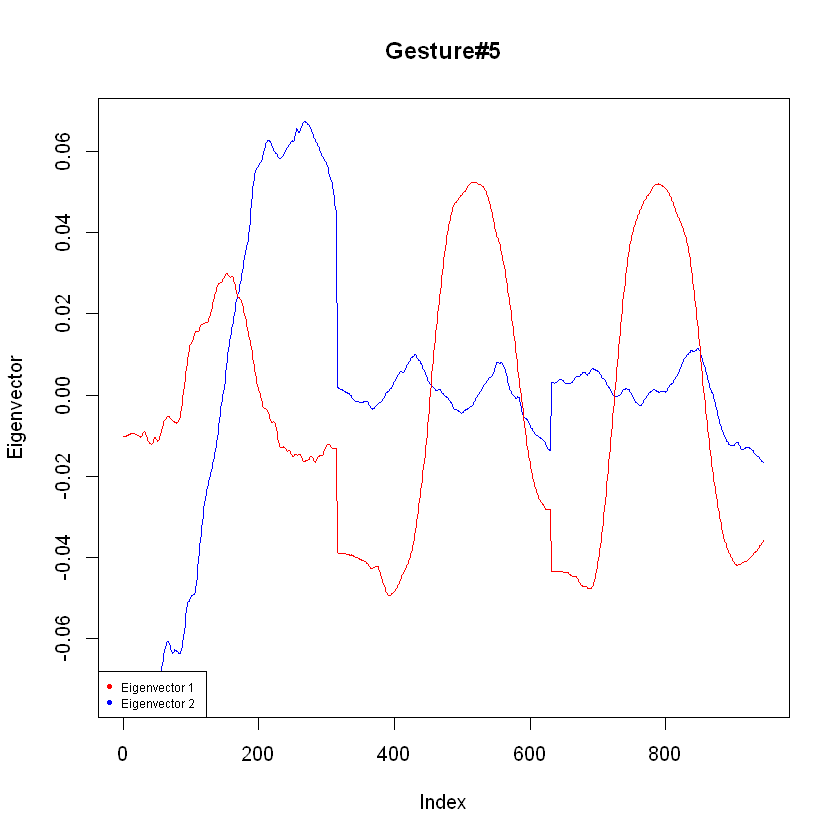

In [293]:
###Class5
Conc_Data5 = Get_Conc(5)
Conc_Data5 = Conc_Data5[,-1]
Conc_Data5 [c(1,2),1:6]

pca5 <- prcomp(Conc_Data5,  scale =T)

##plot

plot(pca5$rotation[,2], type="l",col="blue", main= "Gesture#5",ylab= "Eigenvector")
points(pca5$rotation[,1], type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)

In [294]:
##get explained variation proportion for first 2 comp

vars =  pca5$sdev * pca5$sdev
props = vars / sum(vars)
cumsum(props) [1:2]

[1] 0.3105409 0.4496078

The first eigenvector explains 31% of the variation and the two eigenvectors together explain 44% of the variaton.

# Gesture#6

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
1,-0.30,-0.30,-0.30,-0.30,-0.30,-0.30
10,-1.18,-1.18,-1.18,-1.18,-1.18,-1.18


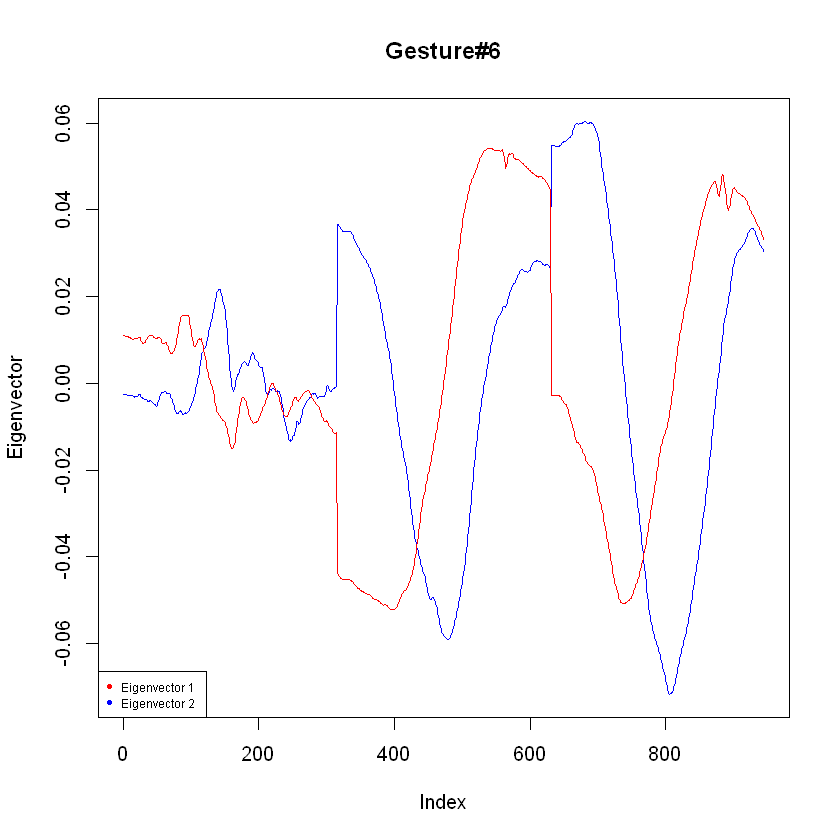

In [295]:
###Class6
Conc_Data6 = Get_Conc(6)
Conc_Data6 = Conc_Data6[,-1]
Conc_Data6 [c(1,2),1:6]

pca6 <- prcomp(Conc_Data6,  scale =T)

##plot

plot(pca6$rotation[,2], type="l",col="blue", main= "Gesture#6",ylab= "Eigenvector")
points(pca6$rotation[,1], type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)


In [303]:
##get explained variation proportion for first 2 comp

vars =  pca6$sdev * pca6$sdev
props = vars / sum(vars)
cumsum(props) [1:2]


[1] 0.2957842 0.4523910

The first eigenvector explains 29% of the variation and the two eigenvectors together explain 45% of the variaton.

# Gesture#7

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
7,1.47,1.47,1.47,1.47,1.47,1.47
12,0.04,0.04,0.04,0.04,0.04,0.04


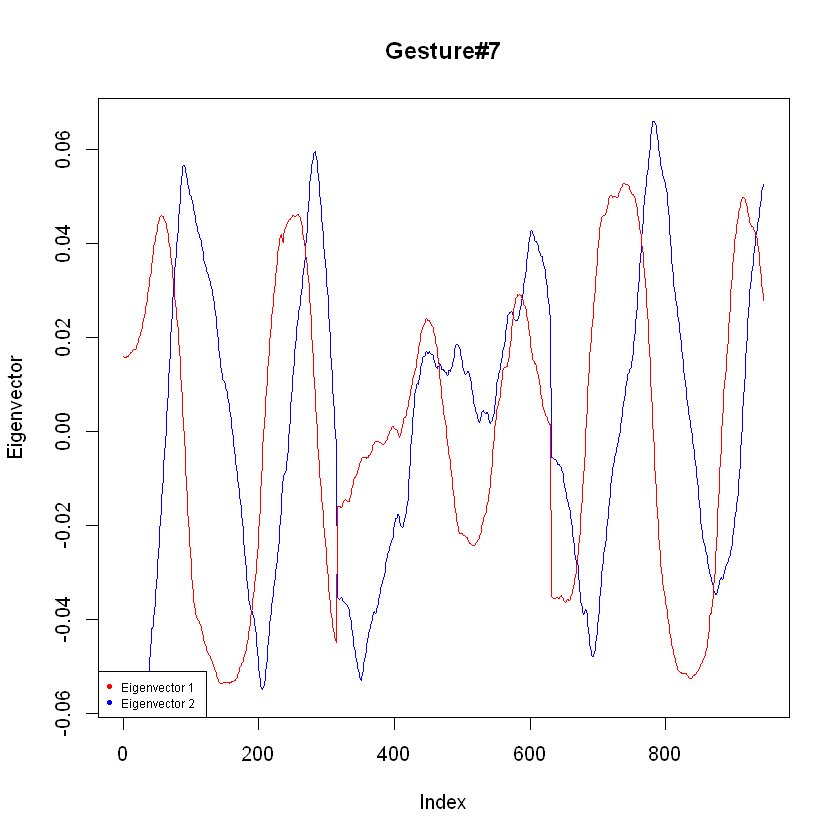

In [297]:
###Class7
Conc_Data7 = Get_Conc(7)
Conc_Data7 = Conc_Data7[,-1]
Conc_Data7 [c(1,2),1:6]

pca7 <- prcomp(Conc_Data7,  scale =T)

##plot

plot(pca7$rotation[,2], type="l",col="blue", main= "Gesture#7",ylab= "Eigenvector")
points(pca7$rotation[,1], type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)

In [298]:
##get explained variation proportion for first 2 comp

vars =  pca7$sdev * pca7$sdev
props = vars / sum(vars)
cumsum(props) [1:2]

[1] 0.2938625 0.4509872

The first eigenvector explains 29% of the variation and the two eigenvectors together explain 45% of the variaton.

# Gesture#8

,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6
6,-0.48,-0.48,-0.48,-0.48,-0.48,-0.48
21,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50


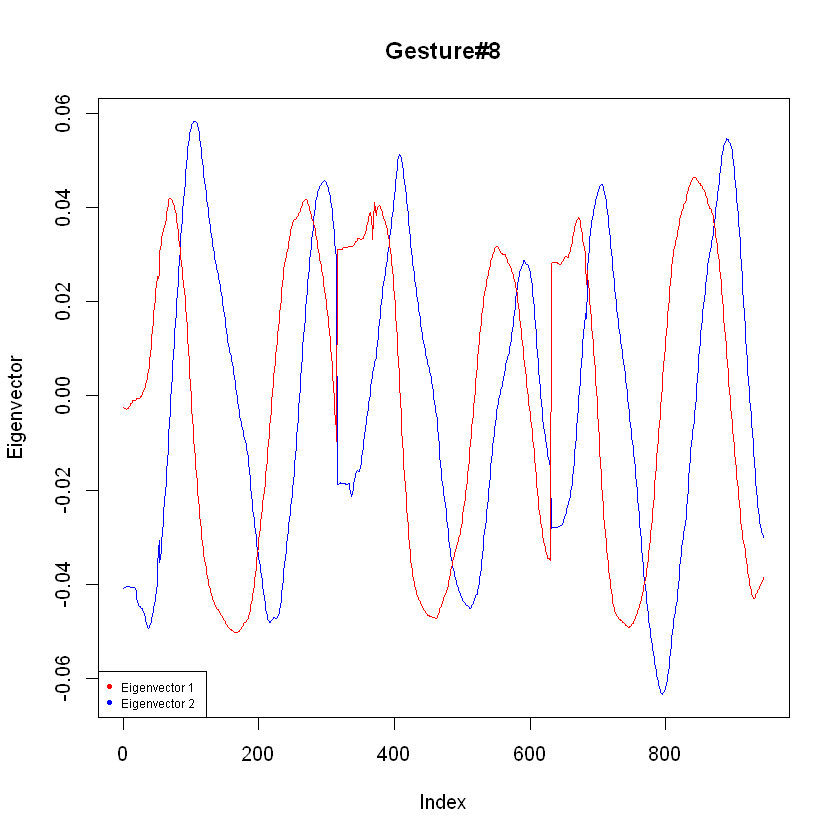

In [299]:
###Class8
Conc_Data8 = Get_Conc(8)
Conc_Data8 = Conc_Data8[,-1]
Conc_Data8 [c(1,2),1:6]

pca8 <- prcomp(Conc_Data8,  scale =T)

##plot

plot(pca8$rotation[,2], type="l",col="blue", main= "Gesture#8",ylab= "Eigenvector")
points(pca8$rotation[,1], type="l",col="red")
legend("bottomleft",paste("Eigenvector",c("1","2")),col=c("red", "blue"), pch= 16,cex= 0.6)

In [300]:
##get explained variation proportion for first 2 comp

vars =  pca8$sdev * pca8$sdev
props = vars / sum(vars)
cumsum(props) [1:2]

[1] 0.3795469 0.5926069

The first eigenvector explains 37% of the variation and the two eigenvectors together explain 59% of the variaton.

#### Are there any interesting patterns/observations? If yes, provide your comments.

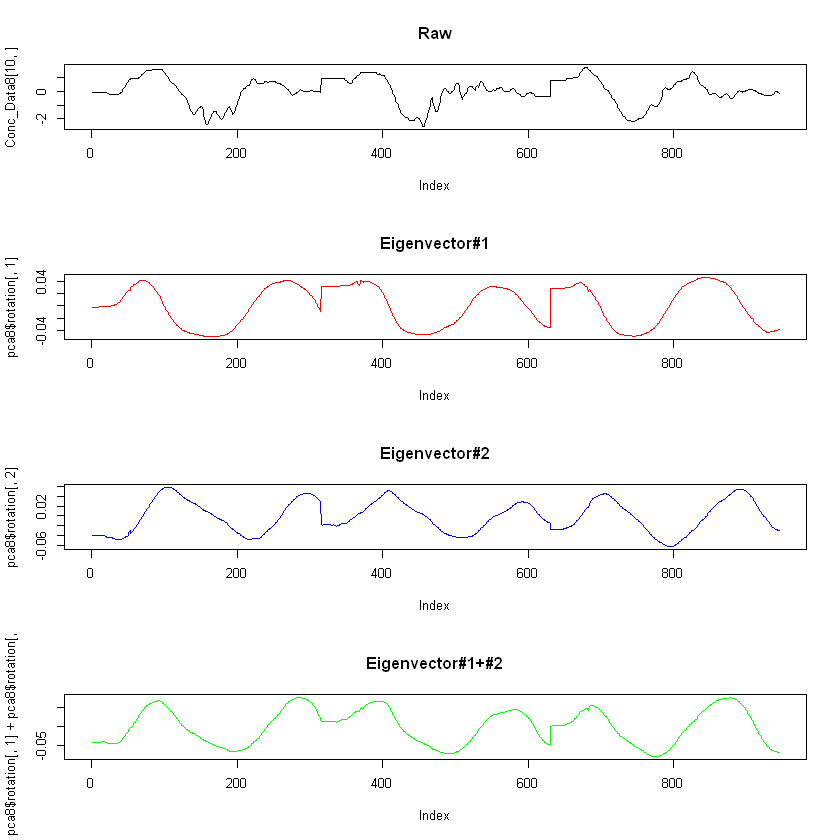

In [305]:
#try to see pattern
par(mfrow=c(4,1))
#the acceleration data for class#8 in x1-x2----y1-y2----z1-z2 format
#get a random instance, say 10th, of the class
#plot time series
plot(c(1:945),Conc_Data8[10,],type="l", xlab="Index", main ="Raw")  
#the eigenvector1
plot(pca8$rotation[,1], type="l",col="red", main ="Eigenvector#1")
#the eigenvector2
plot(pca8$rotation[,2], type="l",col="blue",main ="Eigenvector#2")
#linear combination of the eigenvector1 and #the eigenvector2
plot(pca8$rotation[,1]+pca8$rotation[,2], type="l",col="green", main ="Eigenvector#1+#2")

The pattern of the raw data can be captured mostly by the eigenvector#1. The scales are different.

The graphs of the eigenvectors is more smooth compared to the actual acceleration data in x1-x2---y1-y1---z1-z2-- formatted time series. 

The pattern of the second component also resembles to the real data, and the linear combination of the first two components shows high resemblance to the raw data as well.